In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
import pywt

%matplotlib inline

# Introduction

## Wavelets and functions

$$X_{w(a,b)} =  \frac{1}{|a|^{1/2}} \int_{\infty}^{\infty} x (t) \psi \frac{t-b}{a} dt$$

$\psi(t)$ : mother wavelet

$a$ : scaling factor

$b$ : translation factor

DWT uses discrete values for the scale ($a$) and translation factor ($b$)

- the scale factor increases in powers of two ($a = 1,2,4 ...$)
- the translation factor increases integer values ($b = 1,2,3 ..$)

The DWT is only discrete in the scale and translation domain, and not in the time domain.

## Examples of wavelets

In [2]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

In [3]:
def sample_wavelets(discrete, continuous):
    list_list_wavelets = [discrete, continuous]
    list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]

    fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
    for ii, list_wavelets in enumerate(list_list_wavelets):
        func = list_funcs[ii]
        row_no = ii
        for col_no, waveletname in enumerate(list_wavelets):
            wavelet = func(waveletname)
            family_name = wavelet.family_name
            biorthogonal = wavelet.biorthogonal
            orthogonal = wavelet.orthogonal
            symmetry = wavelet.symmetry
            if ii == 0:
                _ = wavelet.wavefun()
                wavelet_function = _[0]
                x_values = _[-1]
            else:
                wavelet_function, x_values = wavelet.wavefun()
            if col_no == 0 and ii == 0:
                axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
            if col_no == 0 and ii == 1:
                axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
            axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
            axarr[row_no, col_no].plot(x_values, wavelet_function)
            axarr[row_no, col_no].set_yticks([])
            axarr[row_no, col_no].set_yticklabels([])

    plt.tight_layout()
    plt.show()

/Users/rutendosigauke/miniconda3/envs/wavelets/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


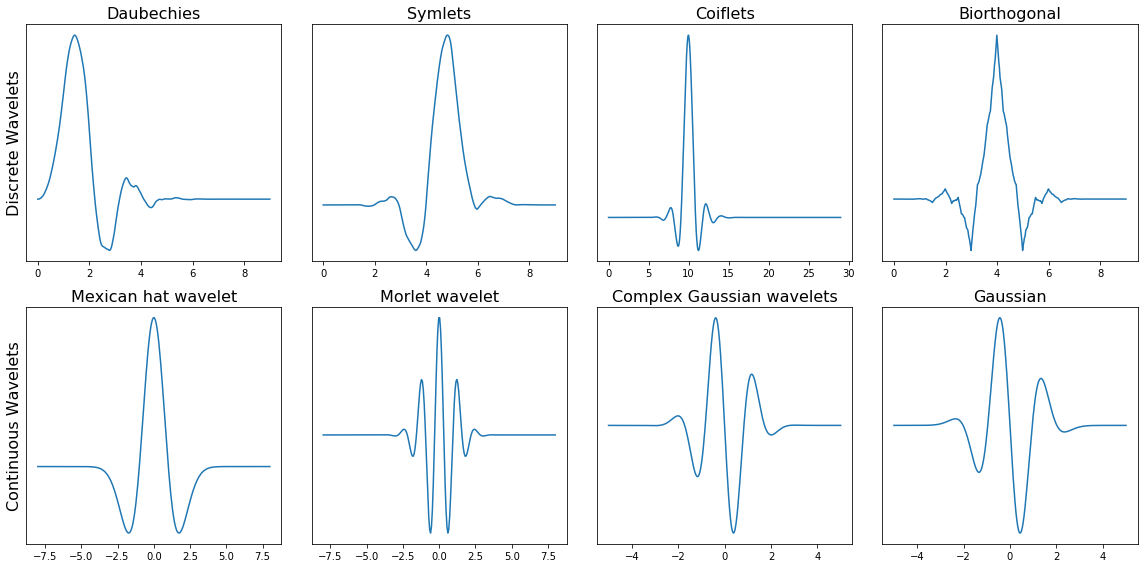

In [4]:
sample_wavelets(discrete_wavelets, continuous_wavelets)

In [5]:
w = pywt.Wavelet('sym5')

In [6]:
print(w)

Wavelet sym5
  Family name:    Symlets
  Short name:     sym
  Filters length: 10
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       near symmetric
  DWT:            True
  CWT:            False


The wavefun() method can be used to calculate approximations of scaling function **(phi)** and wavelet function **(psi)** at the given level of refinement.

For orthogonal wavelets returns approximations of scaling function and wavelet function with corresponding
x-grid coordinates:

In [7]:
[phi, psi, x] = w.wavefun(level=7)
#axarr[row_no, col_no].plot(x_values, wavelet_function, 'bD--')

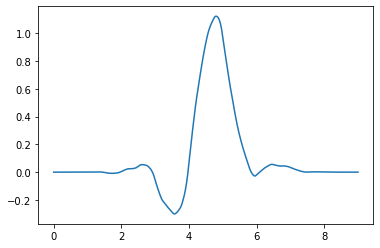

In [8]:
plt.plot(x, phi) 

In [11]:
#plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams["font.family"] = "Times New Roman"

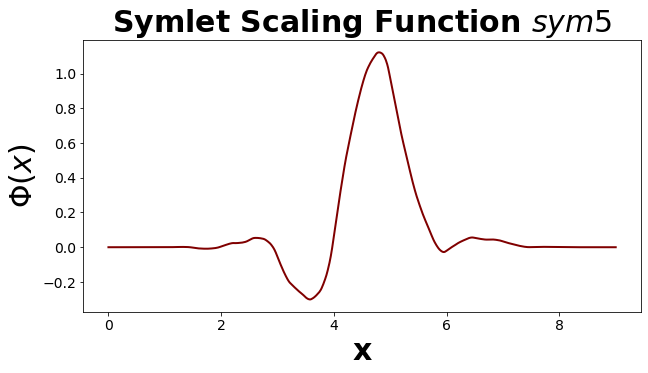

In [10]:
plt.figure(figsize=(10, 5))
 
ax = plt.subplot(111)  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.xlabel("x", fontsize=30, fontweight='bold')  
plt.ylabel(r"$\Phi (x)$", fontsize=30, fontweight='bold')  
plt.plot(x, phi, color = 'maroon',linewidth=2) 
plt.title("Symlet Scaling Function $sym5$",
          fontweight='bold', fontsize=30)  

plt.savefig('./figures/symlet_scaling_fxn_trans.pdf', transparent=True)  

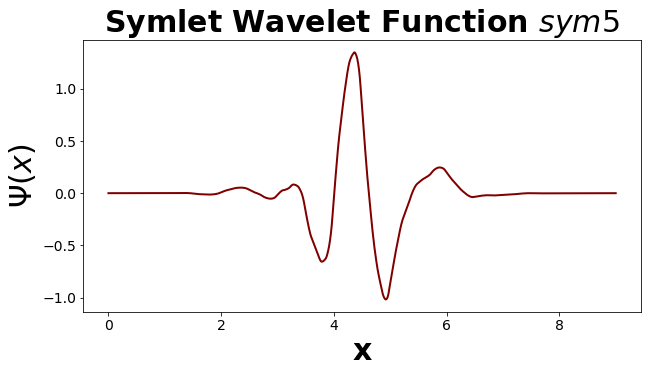

In [11]:
plt.figure(figsize=(10, 5))

ax = plt.subplot(111)  

plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.xlabel("x", fontsize=30, fontweight='bold')  
plt.ylabel(r"$\Psi (x)$", fontsize=30, fontweight='bold')  
plt.plot(x, psi, color = 'maroon',linewidth=2) 
plt.title("Symlet Wavelet Function $sym5$",
          fontweight='bold', fontsize=30)  

plt.savefig('./figures/symlet_wavelet_fxn_trans.pdf', transparent=True)

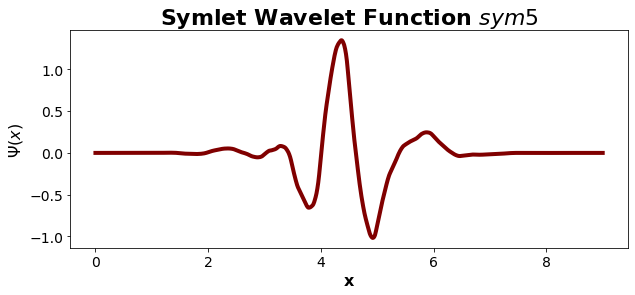

In [12]:
plt.figure(figsize=(10, 4))

ax = plt.subplot(111)  

plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.xlabel("x", fontsize=16, fontweight='bold')  
plt.ylabel(r"$\Psi (x)$", fontsize=16, fontweight='bold')  
plt.plot(x, psi, color = 'maroon',linewidth=4) 
plt.title("Symlet Wavelet Function $sym5$",
          fontweight='bold', fontsize=22)  

plt.savefig('./figures/symlet_wavelet_fxn.png', transparent=True)